In [3]:
#import libraries
import sklearn 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r'drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [10]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 82 kB 846 kB/s             
     |████████████████████████████████| 9.5 MB 12.9 MB/s            
     |████████████████████████████████| 233 kB 32.2 MB/s            


In [11]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [12]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [14]:
# Encoding object features
import category_encoders as ce 

In [15]:
encoder = ce.OrdinalEncoder(cols = ['Sex','BP','Cholesterol','Drug'])
df = encoder.fit_transform(df)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,1,1,25.355,1
1,47,2,2,1,13.093,2
2,47,2,2,1,10.114,2
3,28,1,3,1,7.798,3
4,61,1,2,1,18.043,1


In [16]:
# Defining x and y
x=df.drop(['Drug'],axis=1)
y=df['Drug']

In [17]:
# spiliting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.300, random_state=33)

In [18]:
# Create Model
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf
clf=clf.fit(x_train,y_train)

[Text(209.25, 195.696, 'X[4] <= 14.627\ngini = 0.699\nsamples = 140\nvalue = [64, 11, 35, 17, 13]'),
 Text(167.4, 152.208, 'X[2] <= 1.5\ngini = 0.688\nsamples = 76\nvalue = [0, 11, 35, 17, 13]'),
 Text(83.7, 108.72, 'X[0] <= 50.5\ngini = 0.491\nsamples = 30\nvalue = [0, 0, 0, 17, 13]'),
 Text(41.85, 65.232, 'gini = 0.0\nsamples = 17\nvalue = [0, 0, 0, 17, 0]'),
 Text(125.55000000000001, 65.232, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 0, 13]'),
 Text(251.10000000000002, 108.72, 'X[3] <= 1.5\ngini = 0.364\nsamples = 46\nvalue = [0, 11, 35, 0, 0]'),
 Text(209.25, 65.232, 'X[2] <= 2.5\ngini = 0.497\nsamples = 24\nvalue = [0, 11, 13, 0, 0]'),
 Text(167.4, 21.744, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(251.10000000000002, 21.744, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(292.95, 65.232, 'gini = 0.0\nsamples = 22\nvalue = [0, 0, 22, 0, 0]'),
 Text(251.10000000000002, 152.208, 'gini = 0.0\nsamples = 64\nvalue = [64, 0, 0, 0, 0]')]

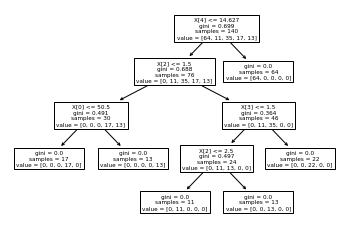

In [19]:
tree.plot_tree(clf)

In [20]:
y_pred = clf.predict(x_test)

In [21]:
print(y_pred)

[1 3 3 1 3 3 5 4 3 4 1 1 4 3 1 2 3 1 1 5 3 3 1 1 1 3 1 3 1 1 3 1 1 1 1 1 1
 2 3 3 2 4 2 3 3 1 1 4 4 1 1 1 2 3 3 1 1 5 1 1]


In [22]:
print(x_train.shape)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)

(140, 5)
(60, 5)
(140, 5)
(60,)


In [26]:
# Training Accuracy
from sklearn import metrics
y_train_pred = clf.predict(x_train)
print(metrics.accuracy_score(y_train, y_train_pred))

1.0


In [27]:
#Testing Accuracy
y_pred = clf.predict(x_test)
print (metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [28]:
predicted = clf.predict(x_test[0:10])
expected = y_test[0:10]

In [29]:
print(predicted)

[1 3 3 1 3 3 5 4 3 4]


In [30]:
print(expected)

15     1
171    3
103    3
119    1
116    3
162    3
54     5
17     4
117    3
100    4
Name: Drug, dtype: int64


In [32]:
#Testing Accuracy 
y_pred = clf.predict(x_test)
print (metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


# End